# Importing the required packages

In [172]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import seaborn
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Unzipping the dataset

In [3]:
from shutil import unpack_archive
unpack_archive('nyc_interview_dataset.zip')

In [4]:
import glob
files = glob.glob("nyc_interview_dataset/*.csv")

In [5]:
files=sorted(files)

## Creating a dataframe with trip data

In [6]:
data = pd.DataFrame()

In [7]:
for i in files[:12]:
    data = data.append(pd.read_csv(i), ignore_index = True)

In [8]:
pd.options.display.max_columns =200
data.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,1,N,-73.992203,40.764019,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,10011,Manhattan,Chelsea and Clinton,10036,Manhattan,Chelsea and Clinton
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,1,N,-73.962173,40.805355,1,7.5,0.0,0.5,2.45,0.0,0.3,10.75,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,1,N,-73.981613,40.768452,1,10.0,0.0,0.5,1.00,0.0,0.3,11.80,10010,Manhattan,Gramercy Park and Murray Hill,10019,Manhattan,Chelsea and Clinton
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,1,N,-73.979996,40.781071,2,12.5,0.0,0.5,0.00,0.0,0.3,13.30,10065,Manhattan,Upper East Side,10023,Manhattan,Upper West Side
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,1,N,-73.984047,40.764519,2,6.5,0.0,0.5,0.00,0.0,0.3,7.30,10065,Manhattan,Upper East Side,10019,Manhattan,Chelsea and Clinton


In [9]:
data.tail()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood
1199995,2,2015-12-16 19:00:26,2015-12-16 19:08:39,2,1.25,-73.974289,40.779854,1,N,-73.975204,40.792549,1,7.5,1.0,0.5,1.4,0.00,0.3,10.70,10023,Manhattan,Upper West Side,10025,Manhattan,Upper West Side
1199996,1,2015-12-07 06:41:33,2015-12-07 06:45:03,1,0.70,-73.991707,40.749870,1,N,-73.980362,40.750969,2,5.0,0.0,0.5,0.0,0.00,0.3,5.80,10001,Manhattan,Chelsea and Clinton,10016,Manhattan,Gramercy Park and Murray Hill
1199997,1,2015-12-02 09:18:35,2015-12-02 09:30:59,1,1.40,-73.955223,40.773376,1,N,-73.968201,40.755070,2,9.5,0.0,0.5,0.0,0.00,0.3,10.30,10028,Manhattan,Upper East Side,10022,Manhattan,Gramercy Park and Murray Hill
1199998,1,2015-12-29 09:02:47,2015-12-29 09:08:49,1,0.60,-73.990509,40.742191,1,N,-73.979141,40.737312,2,5.5,0.0,0.5,0.0,0.00,0.3,6.30,10010,Manhattan,Gramercy Park and Murray Hill,10010,Manhattan,Gramercy Park and Murray Hill
1199999,2,2015-12-09 21:57:56,2015-12-09 22:18:33,2,10.00,-73.870743,40.773689,1,N,-73.860840,40.839020,1,29.5,0.5,0.5,0.0,5.54,0.3,36.34,11369,Queens,West Queens,10462,Bronx,Southeast Bronx


In [10]:
data.shape

(1200000, 25)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
VendorID                 1200000 non-null int64
pickup_datetime          1200000 non-null object
dropoff_datetime         1200000 non-null object
passenger_count          1200000 non-null int64
trip_distance            1200000 non-null float64
pickup_longitude         1200000 non-null float64
pickup_latitude          1200000 non-null float64
RateCodeID               1200000 non-null int64
store_and_fwd_flag       1200000 non-null object
dropoff_longitude        1200000 non-null float64
dropoff_latitude         1200000 non-null float64
payment_type             1200000 non-null int64
fare_amount              1200000 non-null float64
extra                    1200000 non-null float64
mta_tax                  1200000 non-null float64
tip_amount               1200000 non-null float64
tolls_amount             1200000 non-null float64
improvement_surcharge    1200000 non-null float6

In [12]:
data.isnull().sum()#No null values

VendorID                 0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
pickup_zip               0
pickup_borough           0
pickup_neighborhood      0
dropoff_zip              0
dropoff_borough          0
dropoff_neighborhood     0
dtype: int64

## Calculating tip %

In [13]:
#Assuming tip% to be on total_amount - tip_amout
data['tip_percentage']= data['tip_amount']*100/(data['total_amount']-data['tip_amount'])

## Exploratory Data Analysis

In [14]:
data['tip_percentage'].describe()
#Mean = 11.8%
#Std = 12.9%
#Median = 13.7%
#max = 4581%

count    1.200000e+06
mean     1.171852e+01
std      1.291586e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.369863e+01
75%      2.000000e+01
max      4.581538e+03
Name: tip_percentage, dtype: float64

#### The unrealistic tip % suggests the data is not clean and needs to be dealt with.

In [15]:
data[data['tip_percentage']>20].shape#ABout 190000 observations greater than 20% tip amount

(189260, 26)

In [16]:
data[data['tip_percentage']>100].shape# We can drop the data having above 100% tip as it seems quite unrealistic

(496, 26)

In [17]:
data= data[data['tip_percentage']<=100]

In [18]:
#Calculating the trip duration in minutes
data['trip_duration']= (pd.to_datetime(data['dropoff_datetime'])-pd.to_datetime(data['pickup_datetime']))/np.timedelta64(1,'m')

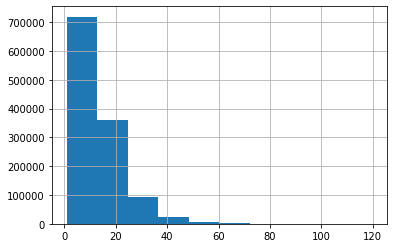

In [19]:
data.trip_duration.hist()

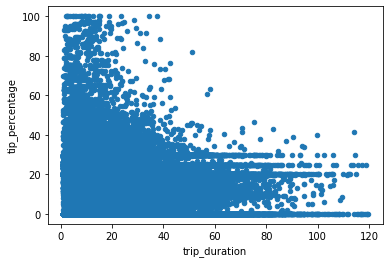

In [20]:
data.plot.scatter(x = 'trip_duration', y ='tip_percentage')

### Some indication that lesser the trip duration, higher is the chance of a bigger tip %

In [21]:
data[data.trip_distance>30].shape#Very few observations with trip distance greater than 30 miles hence dropping those rows

(36, 27)

In [22]:
data[data.trip_distance>30]

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood,tip_percentage,trip_duration
4527,1,2015-01-18 03:43:34,2015-01-18 04:33:38,4,31.70,-73.993523,40.721020,2,N,-73.854454,40.663609,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,10002,Manhattan,Lower East Side,11414,Queens,Southwest Queens,0.000000,50.066667
18698,1,2015-01-03 13:31:23,2015-01-03 14:35:44,2,162.70,-73.969696,40.757057,1,N,-73.789711,40.666927,2,2.5,0.0,0.5,0.00,5.33,0.0,8.63,10022,Manhattan,Gramercy Park and Murray Hill,11434,Queens,Jamaica,0.000000,64.350000
65985,2,2015-01-12 12:11:35,2015-01-12 13:51:33,1,43.24,-73.826599,40.729214,4,N,-73.815628,40.700443,1,193.5,0.0,0.5,0.00,0.00,0.3,194.30,11367,Queens,Central Queens,11418,Queens,Southwest Queens,0.000000,99.966667
179272,1,2015-02-06 16:07:44,2015-02-06 16:35:23,1,11800000.30,-73.994041,40.751209,1,N,-73.954895,40.778282,1,19.5,1.0,0.5,4.26,0.00,0.3,25.56,10001,Manhattan,Chelsea and Clinton,10028,Manhattan,Upper East Side,20.000000,27.650000
211649,2,2015-03-01 15:44:39,2015-03-01 17:41:23,1,30.16,-73.996613,40.753101,1,N,-73.874260,40.645802,2,96.0,0.0,0.5,0.00,0.00,0.3,96.80,10001,Manhattan,Chelsea and Clinton,11239,Brooklyn,Canarsie and Flatlands,0.000000,116.733333
258238,1,2015-03-24 15:58:15,2015-03-24 17:32:20,1,31.10,-73.972565,40.749203,2,N,-73.987045,40.749657,1,52.0,0.0,0.5,11.65,5.54,0.3,69.99,10017,Manhattan,Gramercy Park and Murray Hill,10001,Manhattan,Chelsea and Clinton,19.969146,94.083333
270692,1,2015-03-14 04:12:28,2015-03-14 05:19:08,2,30.70,-73.988541,40.759350,1,N,-74.166389,40.549545,1,85.5,0.5,0.5,19.45,10.66,0.3,116.91,10036,Manhattan,Chelsea and Clinton,10312,Staten Island,South Shore,19.956905,66.666667
276475,2,2015-03-26 10:01:17,2015-03-26 11:58:23,1,33.05,-73.870811,40.773689,1,N,-74.003929,40.721050,1,106.5,0.0,0.5,28.21,5.54,0.3,141.05,11369,Queens,West Queens,10013,Manhattan,Greenwich Village and Soho,25.000000,117.100000
306296,2,2015-04-12 11:55:02,2015-04-12 13:04:09,3,39.44,-73.979836,40.735012,1,N,-73.975510,40.733212,1,105.5,0.0,0.5,31.89,0.00,0.3,138.19,10010,Manhattan,Gramercy Park and Murray Hill,10009,Manhattan,Lower East Side,30.000000,69.116667
348960,1,2015-04-03 07:03:04,2015-04-03 08:49:33,4,39.40,-73.932381,40.751900,2,N,-73.976700,40.749275,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,11101,Queens,Northwest Queens,10016,Manhattan,Gramercy Park and Murray Hill,0.000000,106.483333


### There seem to be some unrealistic distances. Need to calculate speed to get rid of bad data

In [23]:
data['speed']= data['trip_distance']/data['trip_duration']

In [24]:
#Greater than 1 mile per minute is unrealistic in nyc
data[data['speed']>=1].shape

(93, 28)

In [25]:
#Ignoring all the data with such high speeds
data = data[data['speed']<1]

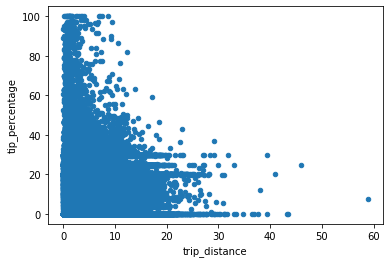

In [26]:
data.plot.scatter(x = 'trip_distance', y ='tip_percentage')

### Higher the trip distance lesser are bigger tip percentages

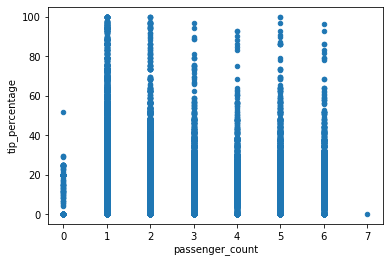

In [27]:
data.plot.scatter(x = 'passenger_count', y ='tip_percentage')

In [28]:
#Passenger counts of 1 and 2 seem to have bigger tip percentages

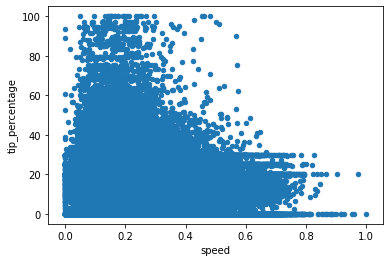

In [29]:
data.plot.scatter(x = 'speed', y ='tip_percentage')

In [30]:
#As speed increases above 0.3, tip percentages seem to taper downward

### Finding categorical variables in mumeric data

C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F71BE806A0>,
      dtype=object)

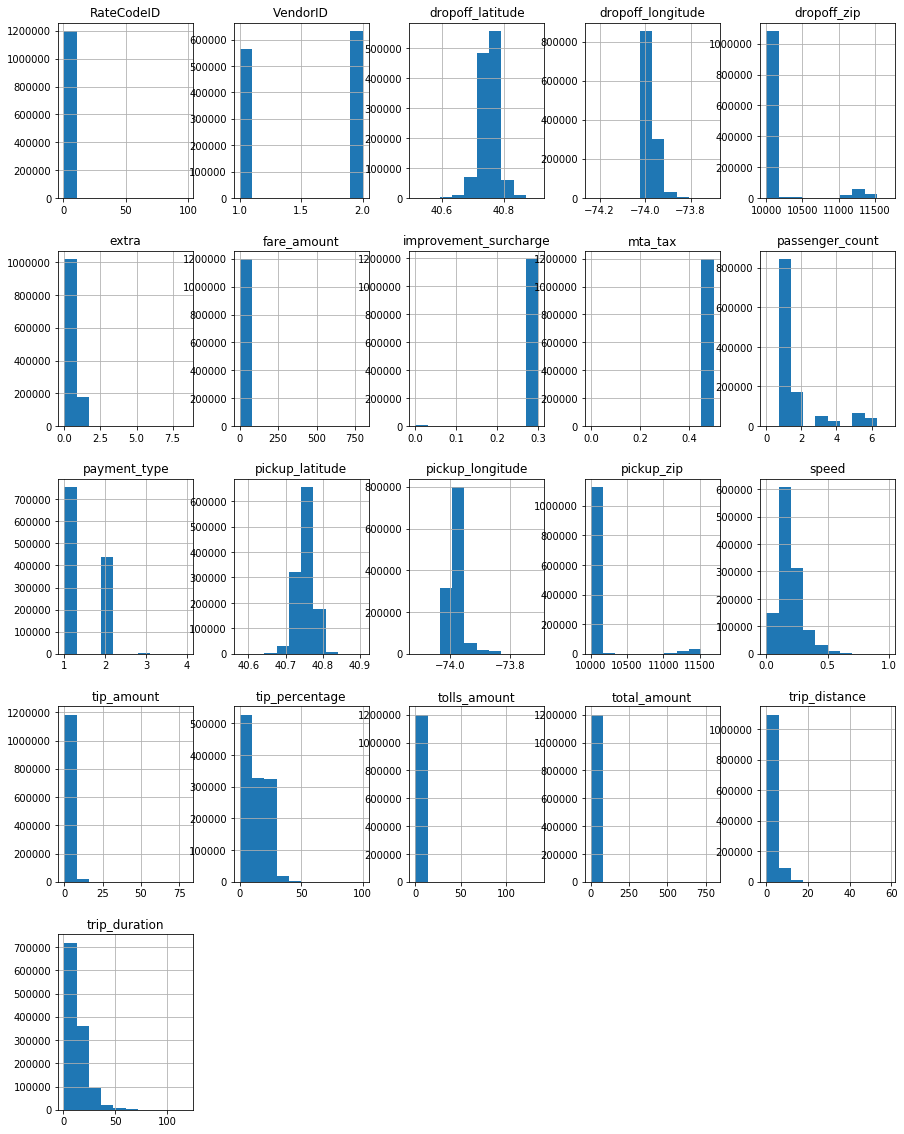

In [31]:
#Plotting histograms of numeric variables
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

#### The distributions of each column show that Vendor ID, Payment Type seem to be categorical columns
#### Need to check if RateCodeID has just one unique value

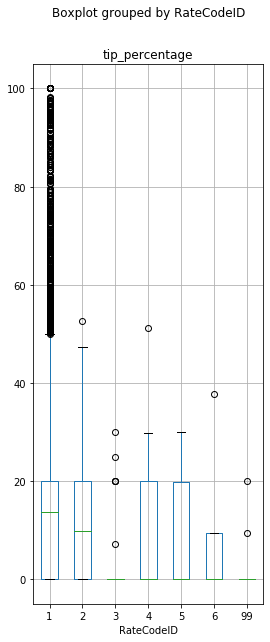

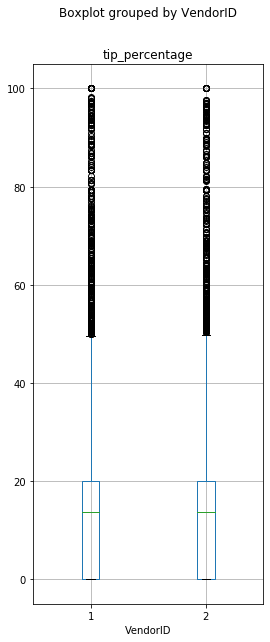

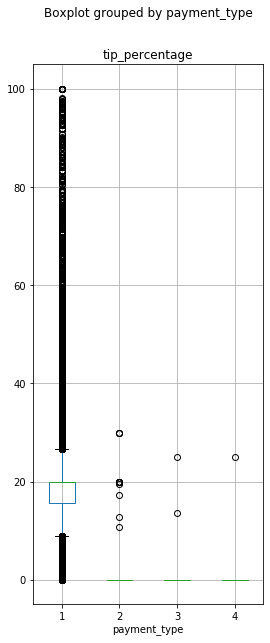

In [33]:
data.boxplot(column = 'tip_percentage',by='RateCodeID',figsize = (4,10))
data.boxplot(column = 'tip_percentage',by='VendorID', figsize = (4,10))
data.boxplot(column = 'tip_percentage',by='payment_type', figsize = (4,10))

### Payment type 1 deifinitely seems to result in a higher trip percentage compared to the others
### Rate Code does have an impact on th tip %

In [35]:
data.VendorID.unique()#Categorical

array([2, 1], dtype=int64)

In [36]:
data.payment_type.unique()#Categorical

array([2, 1, 3, 4], dtype=int64)

In [37]:
data.RateCodeID.unique()#Categorical

array([ 1,  2,  6,  5,  4, 99,  3], dtype=int64)

In [38]:
# Converting payment type to binary based on the box plot above
data['payment_type'] = data['payment_type'].apply(lambda x: 1 if x==1 else 0)

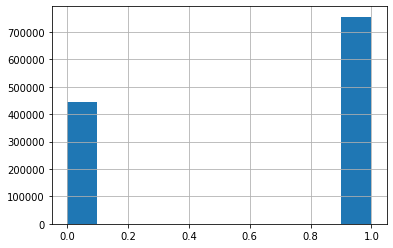

In [39]:
data.payment_type.hist()

In [40]:
#One-hot encoding the categorical columns
data = pd.get_dummies(data, columns=['VendorID', 'RateCodeID', 'payment_type'], drop_first=False)

In [41]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood,tip_percentage,trip_duration,speed,VendorID_1,VendorID_2,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,RateCodeID_99,payment_type_0,payment_type_1
0,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,N,-73.992203,40.764019,9.0,0.0,0.5,0.00,0.0,0.3,9.80,10011,Manhattan,Chelsea and Clinton,10036,Manhattan,Chelsea and Clinton,0.000000,9.766667,0.182253,0,1,1,0,0,0,0,0,0,1,0
1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,N,-73.962173,40.805355,7.5,0.0,0.5,2.45,0.0,0.3,10.75,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side,29.518072,5.183333,0.405145,1,0,1,0,0,0,0,0,0,0,1
2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,N,-73.981613,40.768452,10.0,0.0,0.5,1.00,0.0,0.3,11.80,10010,Manhattan,Gramercy Park and Murray Hill,10019,Manhattan,Chelsea and Clinton,9.259259,10.966667,0.212462,0,1,1,0,0,0,0,0,0,0,1
3,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,N,-73.979996,40.781071,12.5,0.0,0.5,0.00,0.0,0.3,13.30,10065,Manhattan,Upper East Side,10023,Manhattan,Upper West Side,0.000000,17.250000,0.121739,1,0,1,0,0,0,0,0,0,1,0
4,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,N,-73.984047,40.764519,6.5,0.0,0.5,0.00,0.0,0.3,7.30,10065,Manhattan,Upper East Side,10019,Manhattan,Chelsea and Clinton,0.000000,6.733333,0.133663,1,0,1,0,0,0,0,0,0,1,0


In [42]:
#Splitting pickup_datatime and dropoff_datetime into date and time columns
data[['pickupdate','pickuptime']] = data.pickup_datetime.astype(str).str.split(F" ", expand = True)
data[['dropoffdate', 'dropofftime']] = data.dropoff_datetime.astype(str).str.split(" ", expand = True)

In [43]:
#Getting the day of the week
data['day_of_week'] = data['pickup_datetime'].apply(pd.to_datetime).dt.weekday_name

In [44]:
#Getting hour of day
data['dropoff_hour']=data['dropofftime'].astype(str).apply(lambda x: int(x[:2]))

In [45]:
data['dropoff_hour'].unique()

array([11,  9,  7, 12, 10, 20, 21, 15, 22, 19, 18, 16,  8,  5,  2,  3,  6,
       17, 23,  4, 14,  0, 13,  1], dtype=int64)

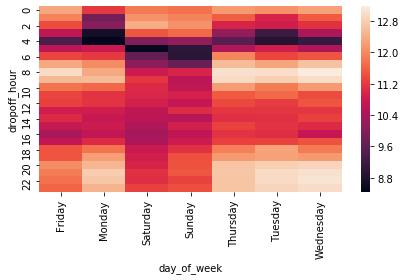

In [46]:
# create pivot table, days will be columns, hours will be rows
piv = pd.pivot_table(data, values="tip_percentage",index=["dropoff_hour"], columns=["day_of_week"], fill_value=0)
#plot pivot table as heatmap using seaborn
#piv.sortlevel(level=0, ascending=True, inplace=True)
ax = seaborn.heatmap(piv)
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90 )
plt.tight_layout()
plt.show()

### Shows that weekday rush hours(7:30 AM to 9:30 AM have higher tip % and so do the evenings and late nights from 5pm
### Weekends seem to have higher tips post midnight

In [48]:
data.store_and_fwd_flag.unique()#Categorical

array(['N', 'Y'], dtype=object)

In [49]:
data.pickup_neighborhood.unique()
data.dropoff_neighborhood.unique()

array(['Chelsea and Clinton', 'Upper West Side', 'Lower Manhattan',
       'Greenwich Village and Soho', 'Central Harlem', 'Upper East Side',
       'Gramercy Park and Murray Hill', 'Southern Brooklyn',
       'East Harlem', 'Lower East Side', 'High Bridge and Morrisania',
       'Northwest Brooklyn', 'Greenpoint', 'Sunset Park',
       'Inwood and Washington Heights', 'North Queens', 'West Queens',
       'Northwest Queens', 'Flatbush', 'Central Brooklyn',
       'Southeast Bronx', 'Bushwick and Williamsburg', 'Northeast Queens',
       'Kingsbridge and Riverdale', 'Jamaica', 'West Central Queens',
       'Southwest Brooklyn', 'Southwest Queens', 'Central Queens',
       'Rockaways', 'Bronx Park and Fordham', 'Canarsie and Flatlands',
       'Hunts Point and Mott Haven', 'Southeast Queens', 'Port Richmond',
       'Central Bronx', 'Stapleton and St. George', 'Borough Park',
       'Northeast Bronx', 'East New York and New Lots', 'Mid-Island',
       'South Shore'], dtype=object)

In [50]:
data = pd.get_dummies(data, columns=['store_and_fwd_flag','pickup_neighborhood', 'dropoff_neighborhood'], drop_first=False)

In [51]:
# Coverting the dates to datetime object
data[['pickupdate','dropoffdate']]= data[['pickupdate','dropoffdate']].apply(pd.to_datetime)
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,dropoff_zip,dropoff_borough,tip_percentage,trip_duration,speed,VendorID_1,VendorID_2,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,RateCodeID_99,payment_type_0,payment_type_1,pickupdate,pickuptime,dropoffdate,dropofftime,day_of_week,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_neighborhood_Borough Park,pickup_neighborhood_Bronx Park and Fordham,pickup_neighborhood_Bushwick and Williamsburg,pickup_neighborhood_Canarsie and Flatlands,pickup_neighborhood_Central Bronx,pickup_neighborhood_Central Brooklyn,pickup_neighborhood_Central Harlem,pickup_neighborhood_Central Queens,pickup_neighborhood_Chelsea and Clinton,pickup_neighborhood_East Harlem,pickup_neighborhood_East New York and New Lots,pickup_neighborhood_Flatbush,pickup_neighborhood_Gramercy Park and Murray Hill,pickup_neighborhood_Greenpoint,pickup_neighborhood_Greenwich Village and Soho,pickup_neighborhood_High Bridge and Morrisania,pickup_neighborhood_Hunts Point and Mott Haven,pickup_neighborhood_Inwood and Washington Heights,pickup_neighborhood_Jamaica,pickup_neighborhood_Kingsbridge and Riverdale,pickup_neighborhood_Lower East Side,pickup_neighborhood_Lower Manhattan,pickup_neighborhood_North Queens,pickup_neighborhood_Northeast Bronx,pickup_neighborhood_Northeast Queens,pickup_neighborhood_Northwest Brooklyn,pickup_neighborhood_Northwest Queens,pickup_neighborhood_Port Richmond,pickup_neighborhood_Rockaways,pickup_neighborhood_Southeast Bronx,pickup_neighborhood_Southeast Queens,pickup_neighborhood_Southern Brooklyn,pickup_neighborhood_Southwest Brooklyn,pickup_neighborhood_Southwest Queens,pickup_neighborhood_Stapleton and St. George,pickup_neighborhood_Sunset Park,pickup_neighborhood_Upper East Side,pickup_neighborhood_Upper West Side,pickup_neighborhood_West Central Queens,pickup_neighborhood_West Queens,dropoff_neighborhood_Borough Park,dropoff_neighborhood_Bronx Park and Fordham,dropoff_neighborhood_Bushwick and Williamsburg,dropoff_neighborhood_Canarsie and Flatlands,dropoff_neighborhood_Central Bronx,dropoff_neighborhood_Central Brooklyn,dropoff_neighborhood_Central Harlem,dropoff_neighborhood_Central Queens,dropoff_neighborhood_Chelsea and Clinton,dropoff_neighborhood_East Harlem,dropoff_neighborhood_East New York and New Lots,dropoff_neighborhood_Flatbush,dropoff_neighborhood_Gramercy Park and Murray Hill,dropoff_neighborhood_Greenpoint,dropoff_neighborhood_Greenwich Village and Soho,dropoff_neighborhood_High Bridge and Morrisania,dropoff_neighborhood_Hunts Point and Mott Haven,dropoff_neighborhood_Inwood and Washington Heights,dropoff_neighborhood_Jamaica,dropoff_neighborhood_Kingsbridge and Riverdale,dropoff_neighborhood_Lower East Side,dropoff_neighborhood_Lower Manhattan,dropoff_neighborhood_Mid-Island,dropoff_neighborhood_North Queens,dropoff_neighborhood_Northeast Bronx,dropoff_neighborhood_Northeast Queens,dropoff_neighborhood_Northwest Brooklyn,dropoff_neighborhood_Northwest Queens,dropoff_neighborhood_Port Richmond,dropoff_neighborhood_Rockaways,dropoff_neighborhood_South Shore,dropoff_neighborhood_Southeast Bronx,dropoff_neighborhood_Southeast Queens,dropoff_neighborhood_Southern Brooklyn,dropoff_neighborhood_Southwest Brooklyn,dropoff_neighborhood_Southwest Queens,dropoff_neighborhood_Stapleton and St. George,dropoff_neighborhood_Sunset Park,dropoff_neighborhood_Upper East Side,dropoff_neighborhood_Upper West Side,dropoff_neighborhood_West Central Queens,dropoff_neighborhood_West Queens
0,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,-73.992203,40.764019,9.0,0.0,0.5,0.00,0.0,0.3,9.80,10011,Manhattan,10036,Manhattan,0.000000,9.766667,0.182253,0,1,1,0,0,0,0,0,0,1,0,2015-01-06,11:39:29,2015-01-06,11:49:15,Tuesday,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0

# Reading in the weather data

In [52]:
weather = pd.read_csv(files[12], sep = ';')

In [53]:
weather.head(50)

,pickup_date,avg_temp_C,Rain,Fog,Snow
0,01.01.15,1,NaN,NaN,NaN
1,02.01.15,4,NaN,NaN,NaN
2,03.01.15,3,1.0,NaN,1.0
3,04.01.15,9,1.0,NaN,NaN
4,05.01.15,2,NaN,NaN,NaN
5,06.01.15,-6,NaN,NaN,1.0
6,07.01.15,-9,NaN,NaN,NaN
7,08.01.15,-9,NaN,NaN,NaN
8,09.01.15,-3,NaN,NaN,1.0
9,10.01.15,-7,NaN,NaN,NaN


In [54]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
pickup_date    365 non-null object
avg_temp_C     365 non-null int64
Rain           97 non-null float64
Fog            21 non-null float64
Snow           25 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.3+ KB


In [55]:
weather['pickup_date']=weather['pickup_date'].astype(str).apply(lambda x: dt.datetime.strptime(x, '%d.%m.%y'))

In [56]:
weather.head(30)

,pickup_date,avg_temp_C,Rain,Fog,Snow
0,2015-01-01,1,NaN,NaN,NaN
1,2015-01-02,4,NaN,NaN,NaN
2,2015-01-03,3,1.0,NaN,1.0
3,2015-01-04,9,1.0,NaN,NaN
4,2015-01-05,2,NaN,NaN,NaN
5,2015-01-06,-6,NaN,NaN,1.0
6,2015-01-07,-9,NaN,NaN,NaN
7,2015-01-08,-9,NaN,NaN,NaN
8,2015-01-09,-3,NaN,NaN,1.0
9,2015-01-10,-7,NaN,NaN,NaN


## Replacing missing weather data columns with zeros


In [ ]:
weather = weather.replace(np.nan, 0)

In [58]:
weather.head()

,pickup_date,avg_temp_C,Rain,Fog,Snow
0,2015-01-01,1,0.0,0.0,0.0
1,2015-01-02,4,0.0,0.0,0.0
2,2015-01-03,3,1.0,0.0,1.0
3,2015-01-04,9,1.0,0.0,0.0
4,2015-01-05,2,0.0,0.0,0.0


## Reading in the holidays data

In [59]:
holidays = pd.read_csv(files[13], sep = ';')

In [60]:
holidays.head()

,Date,Holiday
0,01.01.15,New Years Day
1,19.01.15,Martin Luther King Jr. Day
2,12.02.15,Lincoln's Birthday
3,16.02.15,Presidents' Day
4,10.05.15,Mother's Day


In [61]:
holidays['Date']=holidays['Date'].astype(str).apply(lambda x: dt.datetime.strptime(x, '%d.%m.%y'))

In [62]:
holidays

,Date,Holiday
0,2015-01-01,New Years Day
1,2015-01-19,Martin Luther King Jr. Day
2,2015-02-12,Lincoln's Birthday
3,2015-02-16,Presidents' Day
4,2015-05-10,Mother's Day
5,2015-05-25,Memorial Day
6,2015-06-21,Father's Day
7,2015-07-03,Independence Day (observed)
8,2015-09-07,Labor Day
9,2015-10-12,Columbus Day


## Joining all 3 datasets

In [63]:
data= data.merge(weather,left_on='pickupdate', right_on='pickup_date', how = 'left').merge(holidays,left_on='pickupdate', right_on='Date', how = 'left')

In [64]:
data.shape

(1199411, 130)

In [65]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,dropoff_zip,dropoff_borough,tip_percentage,trip_duration,speed,VendorID_1,VendorID_2,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,RateCodeID_99,payment_type_0,payment_type_1,pickupdate,pickuptime,dropoffdate,dropofftime,day_of_week,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_neighborhood_Borough Park,pickup_neighborhood_Bronx Park and Fordham,pickup_neighborhood_Bushwick and Williamsburg,pickup_neighborhood_Canarsie and Flatlands,pickup_neighborhood_Central Bronx,pickup_neighborhood_Central Brooklyn,pickup_neighborhood_Central Harlem,pickup_neighborhood_Central Queens,pickup_neighborhood_Chelsea and Clinton,pickup_neighborhood_East Harlem,pickup_neighborhood_East New York and New Lots,pickup_neighborhood_Flatbush,pickup_neighborhood_Gramercy Park and Murray Hill,pickup_neighborhood_Greenpoint,pickup_neighborhood_Greenwich Village and Soho,pickup_neighborhood_High Bridge and Morrisania,pickup_neighborhood_Hunts Point and Mott Haven,pickup_neighborhood_Inwood and Washington Heights,pickup_neighborhood_Jamaica,pickup_neighborhood_Kingsbridge and Riverdale,pickup_neighborhood_Lower East Side,pickup_neighborhood_Lower Manhattan,pickup_neighborhood_North Queens,pickup_neighborhood_Northeast Bronx,pickup_neighborhood_Northeast Queens,pickup_neighborhood_Northwest Brooklyn,pickup_neighborhood_Northwest Queens,pickup_neighborhood_Port Richmond,pickup_neighborhood_Rockaways,pickup_neighborhood_Southeast Bronx,pickup_neighborhood_Southeast Queens,pickup_neighborhood_Southern Brooklyn,pickup_neighborhood_Southwest Brooklyn,pickup_neighborhood_Southwest Queens,pickup_neighborhood_Stapleton and St. George,pickup_neighborhood_Sunset Park,pickup_neighborhood_Upper East Side,pickup_neighborhood_Upper West Side,pickup_neighborhood_West Central Queens,pickup_neighborhood_West Queens,dropoff_neighborhood_Borough Park,dropoff_neighborhood_Bronx Park and Fordham,dropoff_neighborhood_Bushwick and Williamsburg,dropoff_neighborhood_Canarsie and Flatlands,dropoff_neighborhood_Central Bronx,dropoff_neighborhood_Central Brooklyn,dropoff_neighborhood_Central Harlem,dropoff_neighborhood_Central Queens,dropoff_neighborhood_Chelsea and Clinton,dropoff_neighborhood_East Harlem,dropoff_neighborhood_East New York and New Lots,dropoff_neighborhood_Flatbush,dropoff_neighborhood_Gramercy Park and Murray Hill,dropoff_neighborhood_Greenpoint,dropoff_neighborhood_Greenwich Village and Soho,dropoff_neighborhood_High Bridge and Morrisania,dropoff_neighborhood_Hunts Point and Mott Haven,dropoff_neighborhood_Inwood and Washington Heights,dropoff_neighborhood_Jamaica,dropoff_neighborhood_Kingsbridge and Riverdale,dropoff_neighborhood_Lower East Side,dropoff_neighborhood_Lower Manhattan,dropoff_neighborhood_Mid-Island,dropoff_neighborhood_North Queens,dropoff_neighborhood_Northeast Bronx,dropoff_neighborhood_Northeast Queens,dropoff_neighborhood_Northwest Brooklyn,dropoff_neighborhood_Northwest Queens,dropoff_neighborhood_Port Richmond,dropoff_neighborhood_Rockaways,dropoff_neighborhood_South Shore,dropoff_neighborhood_Southeast Bronx,dropoff_neighborhood_Southeast Queens,dropoff_neighborhood_Southern Brooklyn,dropoff_neighborhood_Southwest Brooklyn,dropoff_neighborhood_Southwest Queens,dropoff_neighborhood_Stapleton and St. George,dropoff_neighborhood_Sunset Park,dropoff_neighborhood_Upper East Side,dropoff_neighborhood_Upper West Side,dropoff_neighborhood_West Central Queens,dropoff_neighborhood_West Queens,pickup_date,avg_temp_C,Rain,Fog,Snow,Date,Holiday
0,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,-73.992203,40.764019,9.0,0.0,0.5,0.00,0.0,0.3,9.80,10011,Manhattan,10036,Manhattan,0.000000,9.766667,0.182253,0,1,1,0,0,0,0,0,0,1,0,2015-01-06,11:39:29,2015-01-

In [66]:
data.drop(['pickup_datetime','dropoff_datetime','pickup_date' ,'Date', 'dropoff_longitude','dropoff_latitude','pickup_latitude', 'pickup_longitude','total_amount'], axis = 1, inplace = True)

In [67]:
data = data.replace(np.nan, 0)

### One-hot encoding of the holidays

In [68]:

data= pd.get_dummies(data, columns = ['Holiday'], drop_first= False)

In [69]:
data.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,pickup_zip,pickup_borough,dropoff_zip,dropoff_borough,tip_percentage,trip_duration,speed,VendorID_1,VendorID_2,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,RateCodeID_99,payment_type_0,payment_type_1,pickupdate,pickuptime,dropoffdate,dropofftime,day_of_week,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_neighborhood_Borough Park,pickup_neighborhood_Bronx Park and Fordham,pickup_neighborhood_Bushwick and Williamsburg,pickup_neighborhood_Canarsie and Flatlands,pickup_neighborhood_Central Bronx,pickup_neighborhood_Central Brooklyn,pickup_neighborhood_Central Harlem,pickup_neighborhood_Central Queens,pickup_neighborhood_Chelsea and Clinton,pickup_neighborhood_East Harlem,pickup_neighborhood_East New York and New Lots,pickup_neighborhood_Flatbush,pickup_neighborhood_Gramercy Park and Murray Hill,pickup_neighborhood_Greenpoint,pickup_neighborhood_Greenwich Village and Soho,pickup_neighborhood_High Bridge and Morrisania,pickup_neighborhood_Hunts Point and Mott Haven,pickup_neighborhood_Inwood and Washington Heights,pickup_neighborhood_Jamaica,pickup_neighborhood_Kingsbridge and Riverdale,pickup_neighborhood_Lower East Side,pickup_neighborhood_Lower Manhattan,pickup_neighborhood_North Queens,pickup_neighborhood_Northeast Bronx,pickup_neighborhood_Northeast Queens,pickup_neighborhood_Northwest Brooklyn,pickup_neighborhood_Northwest Queens,pickup_neighborhood_Port Richmond,pickup_neighborhood_Rockaways,pickup_neighborhood_Southeast Bronx,pickup_neighborhood_Southeast Queens,pickup_neighborhood_Southern Brooklyn,pickup_neighborhood_Southwest Brooklyn,pickup_neighborhood_Southwest Queens,pickup_neighborhood_Stapleton and St. George,pickup_neighborhood_Sunset Park,pickup_neighborhood_Upper East Side,pickup_neighborhood_Upper West Side,pickup_neighborhood_West Central Queens,pickup_neighborhood_West Queens,dropoff_neighborhood_Borough Park,dropoff_neighborhood_Bronx Park and Fordham,dropoff_neighborhood_Bushwick and Williamsburg,dropoff_neighborhood_Canarsie and Flatlands,dropoff_neighborhood_Central Bronx,dropoff_neighborhood_Central Brooklyn,dropoff_neighborhood_Central Harlem,dropoff_neighborhood_Central Queens,dropoff_neighborhood_Chelsea and Clinton,dropoff_neighborhood_East Harlem,dropoff_neighborhood_East New York and New Lots,dropoff_neighborhood_Flatbush,dropoff_neighborhood_Gramercy Park and Murray Hill,dropoff_neighborhood_Greenpoint,dropoff_neighborhood_Greenwich Village and Soho,dropoff_neighborhood_High Bridge and Morrisania,dropoff_neighborhood_Hunts Point and Mott Haven,dropoff_neighborhood_Inwood and Washington Heights,dropoff_neighborhood_Jamaica,dropoff_neighborhood_Kingsbridge and Riverdale,dropoff_neighborhood_Lower East Side,dropoff_neighborhood_Lower Manhattan,dropoff_neighborhood_Mid-Island,dropoff_neighborhood_North Queens,dropoff_neighborhood_Northeast Bronx,dropoff_neighborhood_Northeast Queens,dropoff_neighborhood_Northwest Brooklyn,dropoff_neighborhood_Northwest Queens,dropoff_neighborhood_Port Richmond,dropoff_neighborhood_Rockaways,dropoff_neighborhood_South Shore,dropoff_neighborhood_Southeast Bronx,dropoff_neighborhood_Southeast Queens,dropoff_neighborhood_Southern Brooklyn,dropoff_neighborhood_Southwest Brooklyn,dropoff_neighborhood_Southwest Queens,dropoff_neighborhood_Stapleton and St. George,dropoff_neighborhood_Sunset Park,dropoff_neighborhood_Upper East Side,dropoff_neighborhood_Upper West Side,dropoff_neighborhood_West Central Queens,dropoff_neighborhood_West Queens,avg_temp_C,Rain,Fog,Snow,Holiday_0,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Day after Thanksgiving,Holiday_Father's Day,Holiday_Independence Day (observed),Holiday_Labor Day,Holiday_Lincoln's Birthday,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_Mother's Day,Holiday_New Years Day,Holiday_Presidents' Day,Holiday_Thanksgiving,Holiday_Veterans Day
0,1,1.78,9.0,0.0,0

In [70]:
#Creating the target variable as a binary class label
data['tip_class']= np.where(data['tip_percentage'] > 20, 1, 0)

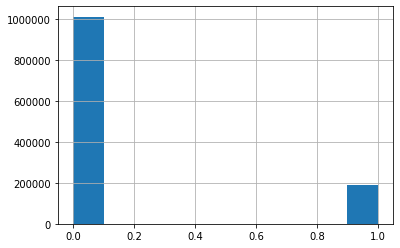

In [71]:
data['tip_class'].hist()

In [72]:
#There is a clear class imbalance

# Random forest model

## Creating train test split

In [73]:
train_x, test_x, train_y, test_y = train_test_split(data[data.columns.difference(['dropoff_borough','dropofftime','dropoff_zip','pickup_borough','pickup_zip','dropoffdate','pickupdate','pickuptime', 'tip_amount', 'tip_percentage','tip_class','day_of_week'])], data['tip_class'],train_size=0.8)


In [73]:
train_x.head()

,Fog,Holiday_0,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Day after Thanksgiving,Holiday_Father's Day,Holiday_Independence Day (observed),Holiday_Labor Day,Holiday_Lincoln's Birthday,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_Mother's Day,Holiday_New Years Day,Holiday_Presidents' Day,Holiday_Thanksgiving,Holiday_Veterans Day,Rain,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,RateCodeID_99,Snow,VendorID_1,VendorID_2,avg_temp_C,dropoff_hour,dropoff_neighborhood_Borough Park,dropoff_neighborhood_Bronx Park and Fordham,dropoff_neighborhood_Bushwick and Williamsburg,dropoff_neighborhood_Canarsie and Flatlands,dropoff_neighborhood_Central Bronx,dropoff_neighborhood_Central Brooklyn,dropoff_neighborhood_Central Harlem,dropoff_neighborhood_Central Queens,dropoff_neighborhood_Chelsea and Clinton,dropoff_neighborhood_East Harlem,dropoff_neighborhood_East New York and New Lots,dropoff_neighborhood_Flatbush,dropoff_neighborhood_Gramercy Park and Murray Hill,dropoff_neighborhood_Greenpoint,dropoff_neighborhood_Greenwich Village and Soho,dropoff_neighborhood_High Bridge and Morrisania,dropoff_neighborhood_Hunts Point and Mott Haven,dropoff_neighborhood_Inwood and Washington Heights,dropoff_neighborhood_Jamaica,dropoff_neighborhood_Kingsbridge and Riverdale,dropoff_neighborhood_Lower East Side,dropoff_neighborhood_Lower Manhattan,dropoff_neighborhood_Mid-Island,dropoff_neighborhood_North Queens,dropoff_neighborhood_Northeast Bronx,dropoff_neighborhood_Northeast Queens,dropoff_neighborhood_Northwest Brooklyn,dropoff_neighborhood_Northwest Queens,dropoff_neighborhood_Port Richmond,dropoff_neighborhood_Rockaways,dropoff_neighborhood_South Shore,dropoff_neighborhood_Southeast Bronx,dropoff_neighborhood_Southeast Queens,dropoff_neighborhood_Southern Brooklyn,dropoff_neighborhood_Southwest Brooklyn,dropoff_neighborhood_Southwest Queens,dropoff_neighborhood_Stapleton and St. George,dropoff_neighborhood_Sunset Park,dropoff_neighborhood_Upper East Side,dropoff_neighborhood_Upper West Side,dropoff_neighborhood_West Central Queens,dropoff_neighborhood_West Queens,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type_0,payment_type_1,pickup_neighborhood_Borough Park,pickup_neighborhood_Bronx Park and Fordham,pickup_neighborhood_Bushwick and Williamsburg,pickup_neighborhood_Canarsie and Flatlands,pickup_neighborhood_Central Bronx,pickup_neighborhood_Central Brooklyn,pickup_neighborhood_Central Harlem,pickup_neighborhood_Central Queens,pickup_neighborhood_Chelsea and Clinton,pickup_neighborhood_East Harlem,pickup_neighborhood_East New York and New Lots,pickup_neighborhood_Flatbush,pickup_neighborhood_Gramercy Park and Murray Hill,pickup_neighborhood_Greenpoint,pickup_neighborhood_Greenwich Village and Soho,pickup_neighborhood_High Bridge and Morrisania,pickup_neighborhood_Hunts Point and Mott Haven,pickup_neighborhood_Inwood and Washington Heights,pickup_neighborhood_Jamaica,pickup_neighborhood_Kingsbridge and Riverdale,pickup_neighborhood_Lower East Side,pickup_neighborhood_Lower Manhattan,pickup_neighborhood_North Queens,pickup_neighborhood_Northeast Bronx,pickup_neighborhood_Northeast Queens,pickup_neighborhood_Northwest Brooklyn,pickup_neighborhood_Northwest Queens,pickup_neighborhood_Port Richmond,pickup_neighborhood_Rockaways,pickup_neighborhood_Southeast Bronx,pickup_neighborhood_Southeast Queens,pickup_neighborhood_Southern Brooklyn,pickup_neighborhood_Southwest Brooklyn,pickup_neighborhood_Southwest Queens,pickup_neighborhood_Stapleton and St. George,pickup_neighborhood_Sunset Park,pickup_neighborhood_Upper East Side,pickup_neighborhood_Upper West Side,pickup_neighborhood_West Central Queens,pickup_neighborhood_West Queens,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,tolls_amount,trip_distance,trip_duration
383723,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0.0,1,0,13,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

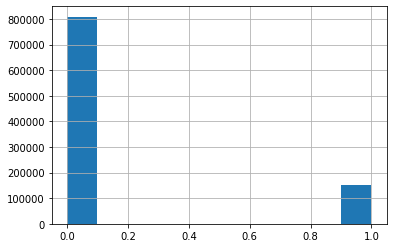

In [74]:
train_y.hist()

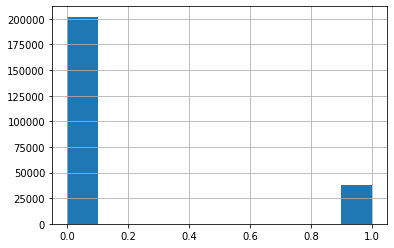

In [75]:
test_y.hist()

In [76]:
#Distribution of target variable seems tpo be similar in train and test

In [278]:
# Create random forest classifier
clf= RandomForestClassifier(class_weight = 'balanced', min_samples_leaf =100,  oob_score = True)
trainedmodel = clf.fit(train_x, train_y)

C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [279]:
rf_predictions = trainedmodel.predict(test_x)

In [280]:
accuracy_score(test_y, rf_predictions)


0.539508843894732

In [ ]:
# confusion_matrix(test_y, rf_predictions)

# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(confusion_matrix(test_y,rf_predictions),annot=True,lw =2,cbar=False)
# plt.ylabel("True Values")
# plt.xlabel("Predicted Values")
# plt.title("CONFUSION MATRIX VISUALIZATION-RANDOM FOREST")
# plt.show()

In [282]:
confusion_matrix(test_y, rf_predictions)

array([[ 92359, 109799],
       [   665,  37060]], dtype=int64)

In [283]:
recall_score(test_y, rf_predictions)#True Positive Rate

0.9823724320742213

## Confusion Matrix

In [284]:
print(classification_report(test_y, rf_predictions))

              precision    recall  f1-score   support

           0       0.99      0.46      0.63    202158
           1       0.25      0.98      0.40     37725

    accuracy                           0.54    239883
   macro avg       0.62      0.72      0.51    239883
weighted avg       0.88      0.54      0.59    239883



In [84]:
importance = clf.feature_importances_
features = pd.DataFrame(importance, index=train_x.columns, 
                          columns=["Importance"])
features.sort_values('Importance', ascending = False)

,Importance
payment_type_1,0.506673
payment_type_0,0.374766
fare_amount,0.026446
tolls_amount,0.017057
trip_distance,0.013214
trip_duration,0.012006
VendorID_2,0.010786
VendorID_1,0.010312
speed,0.004792
pickup_neighborhood_West Queens,0.004712


In [ ]:
class_weight= {0:1.,
              1:4.,
              }

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = class_weight)
trained_lr= logreg.fit(train_x, train_y)

C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [256]:
lr_predictions = trained_lr.predict(test_x)
probs = trained_lr.predict_proba(test_x)


In [304]:

THRESHOLD = 0.47
preds = np.where(trained_lr.predict_proba(test_x)[:,1] > THRESHOLD, 1, 0)

In [299]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score


In [300]:
pd.DataFrame(data=[accuracy_score(test_y, preds), recall_score(test_y, preds),
                   precision_score(test_y, preds), roc_auc_score(test_y, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.527386
recall,0.998012
precision,0.249425
roc_auc_score,0.718787


In [301]:
accuracy_score(test_y, lr_predictions)

0.6048073435799952

In [302]:
recall_score(test_y, lr_predictions)#True Positive Rate

0.8634592445328032

## Confusion Matrix

In [305]:
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.98      0.48      0.64    202158
           1       0.26      0.96      0.40     37725

    accuracy                           0.55    239883
   macro avg       0.62      0.72      0.52    239883
weighted avg       0.87      0.55      0.61    239883



#  XGBoost

In [149]:
# XGBoost

estimator = XGBClassifier(objective = 'binary:logistic', nthread = 4, seed =42,class_weight = class_weight,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 scale_pos_weight=1,
 early_stopping_rounds=50,
 learning_rate =0.01,
 n_estimators=100,
 max_depth=4)

# parameters = {
#     'max_depth' : range (2,10, 2),
#     'n_estimators': range(50,150,50),
#     'learning_rate' :[0.1, 0.01, 0.05]
# }

#Chhosing the best hyperparameters using ROC-AUC
# grid_search = GridSearchCV(
#                 estimator = estimator,
#                 param_grid = parameters,
#                 scoring = 'roc_auc',
#                 cv = 5,
#                 verbose =True)

# X=data[data.columns.difference(['dropoff_borough','dropofftime','dropoff_zip','pickup_borough','pickup_zip','dropoffdate','pickupdate','pickuptime', 'tip_amount', 'tip_percentage','tip_class','day_of_week'])]
# Y=data['tip_class']

estimator.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1.0, 1: 4.0},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=50, gamma=0, learning_rate=0.01,
              max_delta_step=0, max_depth=4, min_child_weight=6, missing=None,
              n_estimators=100, n_jobs=1, nthread=4,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
              subsample=0.8, verbosity=1)

In [144]:
xgb_predictions = estimator.predict(test_x)

In [145]:
accuracy_score(test_y, xgb_predictions)

0.8484928069100353

In [146]:
print(classification_report(test_y, xgb_predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92    202158
           1       0.70      0.06      0.12     37725

    accuracy                           0.85    239883
   macro avg       0.77      0.53      0.52    239883
weighted avg       0.83      0.85      0.79    239883



In [153]:
recall_score(test_y, xgb_predictions)#True Positive Rate

0.06430748840291584

## Ensemble Model

In [286]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('lr', trained_lr), ('xgb', estimator), ('rf', trainedmodel)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [287]:
#fit model to training data
ensemble.fit(train_x, train_y)
#test our model on the test data
ensemble.score(test_x, test_y)

C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\srghat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.6105059549863892

In [288]:
ensemble_predictions = ensemble.predict(test_x)

In [289]:
accuracy_score(test_y, ensemble_predictions)

0.6105059549863892

## Confusion Matrix

In [292]:
print(classification_report(test_y, ensemble_predictions))

              precision    recall  f1-score   support

           0       0.95      0.56      0.71    202158
           1       0.27      0.86      0.41     37725

    accuracy                           0.61    239883
   macro avg       0.61      0.71      0.56    239883
weighted avg       0.85      0.61      0.66    239883



In [291]:
recall_score(test_y, ensemble_predictions)#True Positive Rate

0.8563552021206097